## Installing pre-prerequisite and importing necessary libraries

In [ ]:
! pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.4 MB/s eta 0:00:00


In [ ]:
import os
from numpy import array
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import string
from glob import glob 
import mne 

from sklearn import model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

### Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Data Pre-Processing

## Loading and visualizing dataset

In [ ]:
patient_file_path = glob('/content/drive/MyDrive/EC/ADHD_EC/*.csv')
healthy_file_path = glob('/content/drive/MyDrive/EC/HEALTHY_EC/*.csv')
print(len(patient_file_path),len(healthy_file_path))

78 47


### Loading Data

 Taking one sample of data and visualizing it

In [ ]:
data = pd.read_csv(patient_file_path[0]) 

data.head(10)

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC3,FCz,FC4,...,O1,Oz,O2,VPVA,VNVB,HPHL,HNHR,Erbs,OrbOcc,Mass
0,-17149.385653,-23354.417399,-23080.737967,-7600.407851,-666.505412,-18421.223289,-8613.059395,-4691.826670,801.211909,-8939.002690,...,-6960.567675,-6180.876180,-8708.489569,-13261.970721,-20841.673801,-7298.118190,-8124.615017,-925.126829,-21225.715938,-6364.019294
1,-17148.005335,-23355.044817,-23082.494736,-7600.909785,-665.752511,-18426.493595,-8612.871170,-4691.638445,802.278519,-8937.622371,...,-6960.881384,-6179.684087,-8706.168125,-13258.080733,-20844.183470,-7296.235938,-8124.740500,-924.060219,-21224.900296,-6367.344605
2,-17146.499533,-23358.119162,-23082.871186,-7605.176223,-664.560418,-18430.634549,-8612.933912,-4693.332471,803.596095,-8935.175444,...,-6961.508801,-6177.362643,-8703.783939,-13261.845237,-20845.877497,-7295.357554,-8126.120818,-923.244577,-21223.331753,-6372.112977
3,-17152.020806,-23363.514950,-23083.875054,-7608.689760,-663.242842,-18433.457927,-8614.753422,-4695.089240,804.474479,-8933.481417,...,-6962.575411,-6175.668616,-8702.152654,-13271.193755,-20847.759749,-7296.675130,-8128.944196,-923.181835,-21223.080786,-6375.375547
4,-17162.498675,-23367.404938,-23085.945531,-7607.936859,-662.615425,-18433.708894,-8618.266959,-4695.591174,804.348996,-8934.046093,...,-6963.328311,-6175.292166,-8701.525236,-13279.475664,-20850.332160,-7298.745607,-8132.896925,-923.056352,-21225.464971,-6374.810871
5,-17168.647365,-23366.463812,-23087.514074,-7606.180091,-663.807518,-18429.818906,-8621.090337,-4696.218591,803.031419,-8936.681246,...,-6962.575411,-6175.041199,-8700.897819,-13282.236300,-20852.277153,-7300.502376,-8136.347720,-922.366192,-21229.354959,-6372.175719
6,-17165.133828,-23362.260116,-23087.702299,-7608.752502,-666.819121,-18423.732958,-8621.717754,-4698.853744,800.898201,-8939.379140,...,-6960.128483,-6173.598139,-8699.266534,-13280.605015,-20851.210544,-7302.259144,-8138.167231,-921.864259,-21231.864628,-6370.858142
7,-17157.291111,-23360.440606,-23087.388591,-7615.152158,-670.269916,-18420.407647,-8621.655012,-4702.931956,798.702240,-8940.132041,...,-6957.367847,-6171.213953,-8696.882348,-13278.534538,-20846.881365,-7303.639462,-8139.171098,-922.240709,-21230.860760,-6372.050235
8,-17153.212899,-23363.954143,-23086.949399,-7618.665695,-671.901201,-18422.164415,-8623.035331,-4704.939692,797.635631,-8938.563497,...,-6955.673820,-6169.582668,-8694.937355,-13277.279703,-20841.924768,-7303.012045,-8140.237708,-923.495544,-21227.158998,-6373.493295
9,-17155.283376,-23369.851865,-23085.694564,-7614.211032,-670.395399,-18426.305369,-8625.482258,-4701.990830,798.388531,-8935.740120,...,-6955.485595,-6169.519926,-8694.560904,-13274.895517,-20839.289615,-7299.874958,-8139.986741,-924.813120,-21223.959170,-6372.677652


Creating RawArray with float64 data, n_channels=33, n_times=60023
    Range : 0 ... 60022 =      0.000 ...   120.044 secs
Ready.
Using matplotlib as 2D backend.


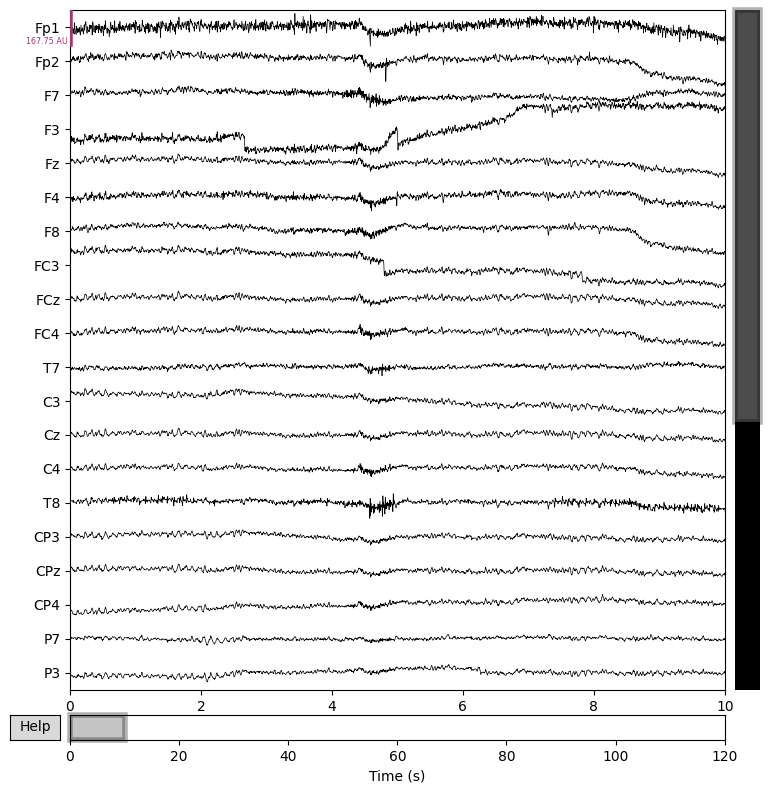

<RawArray | 33 x 60023 (120.0 s), ~15.1 MB, data loaded>

In [ ]:
data = pd.read_csv(patient_file_path[0]) 
# data = data.filter(['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz'])
# ch_names = ['CH 1', 'CH 2', 'CH 3', 'CH 4', 'CH 5', 'CH 6', 'CH 7']
ch_names = data.columns.tolist()
sfreq = 500
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
raw_data = mne.io.RawArray(data.transpose(), info)

raw_data.plot()
raw_data

Reading all data files

In [ ]:
def read_data(file_path):
    data = pd.read_csv(file_path, usecols=range(26)) 
    # data = data.filter(['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz'])
    # ch_names = ['CH 1', 'CH 2', 'CH 3', 'CH 4', 'CH 5', 'CH 6', 'CH 7']
    ch_names = data.columns.tolist()
    sfreq = 500 
    info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
    raw_data = mne.io.RawArray(data.transpose(), info)

    epochs = mne.make_fixed_length_epochs(raw_data, duration = 16, overlap = 3)
    array = epochs.get_data()
    return array

In [ ]:
%%capture
control_epochs_array = [read_data(i) for i in healthy_file_path]
patient_epochs_array = [read_data(i) for i in patient_file_path]

In [ ]:
control_epochs_array[0].shape,  patient_epochs_array[0].shape

((9, 26, 8000), (9, 26, 8000))

## Labelling and Manupulation

Labelling all data

In [ ]:
control_epochs_labels = [len(i)*[0] for i in control_epochs_array]
patient_epochs_labels = [len(i)*[1] for i in patient_epochs_array]
len(control_epochs_labels), len(patient_epochs_labels)

(47, 78)

Combining Healthy and MDD Files

In [ ]:
data_list = control_epochs_array + patient_epochs_array
label_list = control_epochs_labels + patient_epochs_labels

Combing the training data and label data


In [ ]:
epochs_array=control_epochs_array+patient_epochs_array
epochs_labels=control_epochs_labels+patient_epochs_labels
print(len(epochs_array),len(epochs_labels))

125 125


Creating Groups

In [ ]:
groups = [[i]*len(j) for i,j in enumerate(data_list)]
len(groups)

125

Converting the Data from List to array


In [ ]:
data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
groups_array = np.hstack(groups)

print(data_array.shape, label_array.shape, groups_array.shape)

(1087, 26, 8000) (1087,) (1087,)


## Feature Extraction

In [ ]:
from scipy import stats

def mean(x):
    return np.mean(x,axis=-1)
def std(x):  
    return np.std(x,axis=-1)
def ptp(x):
    return np.ptp(x,axis=-1)
def var(x):
    return np.var(x,axis=-1)
def minim(x):
    return np.min(x,axis=-1)
def maxim(x):
    return np.max(x,axis=-1)
def argminim(x):
    return np.argmin(x,axis=-1) 
def argmaxim(x):
    return np.argmax(x,axis=-1)   
                   
def abs_diff_signals(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)
def skewness(x):
    return stats.skew(x,axis=-1)
def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concatenate_features(x):
    return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),argmaxim(x),abs_diff_signals(x),\
                           skewness(x),kurtosis(x)),axis=-1) 

extracting the features

In [ ]:
features=[]
for d in data_array:
    features.append(concatenate_features(d))

Converting features list into features arrays

In [ ]:
features_array=np.array(features)
features_array.shape

(1087, 286)

## Splitting training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_array,label_array,test_size=0.20, shuffle=True)

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)


# Confusion Matrix and ROC curve

In [ ]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf.pdf')  

    if title:
        plt.title(title)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# KNN 

## Hyperparameter tunning for KNN

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Split data into k folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {
    'n_neighbors': [ 2, 3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean'],
    
}
# knn_model = KNeighborsClassifier()
gscv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=kfold )

t0 = time.time()
knn_result = gscv.fit(x_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % gscv.best_score_)

print("Best parameters set:")
best_parameters = gscv.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


done in 1.117s

Best score: 0.964
Best parameters set:
	metric: 'euclidean'
	n_neighbors: 4
	weights: 'distance'


## Testing KNN Model

Precision: 0.964
Recall: 0.985
Accuracy: 0.968
F1 Score: 0.974


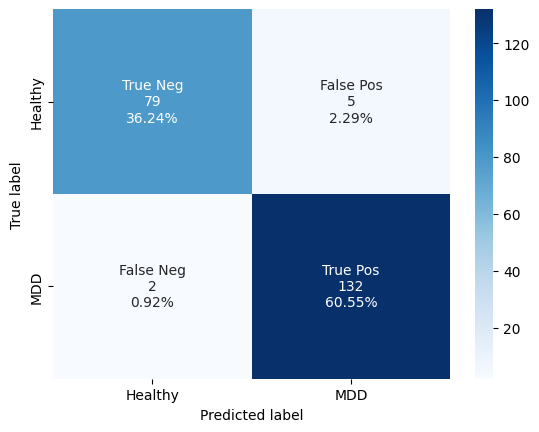

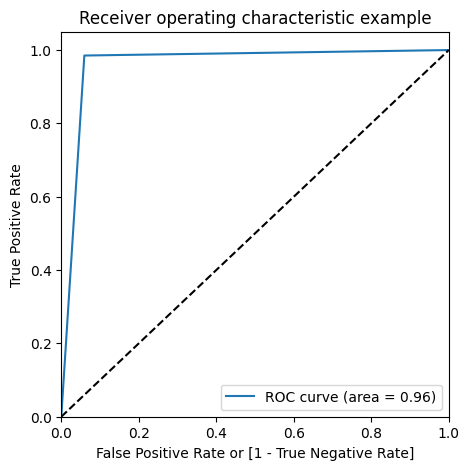

In [ ]:
# knn_model = KNeighborsClassifier(**knn_result.best_params_)
knn_predictions = gscv.predict(x_test)

# Calculate evaluation metrics with k-fold cross-validation
precision_scores = cross_val_score(gscv, features_array, label_array, cv=kfold, scoring='precision')
recall_scores = cross_val_score(gscv, features_array, label_array, cv=kfold, scoring='recall')
accuracy_scores = cross_val_score(gscv, features_array, label_array, cv=kfold, scoring='accuracy')
f1_scores = cross_val_score(gscv, features_array, label_array, cv=kfold, scoring='f1')

	
print('Precision: %.3f' % precision_score(y_test, knn_predictions))
print('Recall: %.3f' % recall_score(y_test, knn_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, knn_predictions))
print('F1 Score: %.3f' % f1_score(y_test, knn_predictions))

# Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Healthy', 'MDD']
knn_cf_matrix = confusion_matrix(y_test, knn_predictions)

make_confusion_matrix(knn_cf_matrix, group_names=labels, categories=categories, cmap='Blues')

# ROC curve
draw_roc(y_test, knn_predictions)


# Logistic Regression for Classification

## Hyperparameter tunning for Logistic regression

In [ ]:
param_grid={
    'C':[0.1,0.3,0.5,0.7,1,3,5,7,9,11,13,15,17,19],  # Random Parameters
    'penalty': ['l2']
} 

gscv = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, n_jobs=12)

t0 = time.time()
logistic_result = gscv.fit(x_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % gscv.best_score_)

print("Best parameters set:")
best_parameters = gscv.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


done in 17.459s

Best score: 0.831
Best parameters set:
	C: 0.1
	penalty: 'l2'


## Testing Logistic Regression Model

Precision: 0.877
Recall: 0.903
Accuracy: 0.862
F1 Score: 0.890


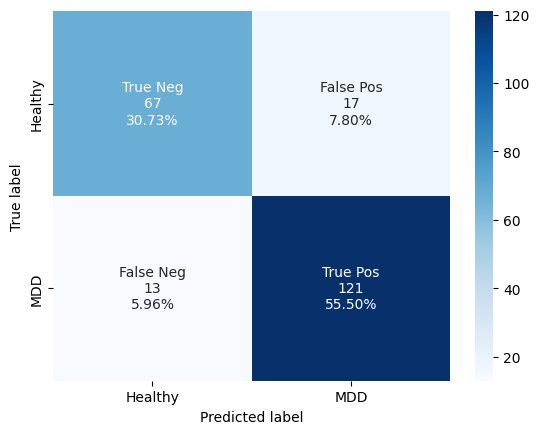

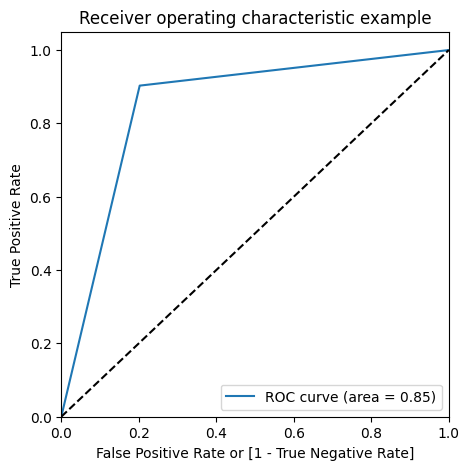

In [ ]:
logistic_predictions = gscv.predict(x_test)
	
print('Precision: %.3f' % precision_score(y_test, logistic_predictions))
print('Recall: %.3f' % recall_score(y_test, logistic_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, logistic_predictions))
print('F1 Score: %.3f' % f1_score(y_test, logistic_predictions))



# Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Healthy', 'MDD']
logistic_cf_matrix = confusion_matrix(y_test, logistic_predictions)

make_confusion_matrix(logistic_cf_matrix, group_names=labels, categories=categories, cmap='Blues')

# ROC curve
draw_roc(y_test, logistic_predictions)

# SVM for Classification

## Hyperparameter tunning for SVM

In [ ]:
param_grid={
    "C": [10, 100, 1000],  # Random Parameters
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": [0.01, 0.1, 1, 10],
} 

gscv = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=12)

t0 = time.time()
svm_result = gscv.fit(x_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % gscv.best_score_)

print("Best parameters set:")
best_parameters = gscv.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


done in 33.065s

Best score: 0.942
Best parameters set:
	C: 10
	gamma: 0.01
	kernel: 'poly'


## Testing SVM Model

Precision: 0.943
Recall: 0.993
Accuracy: 0.959
F1 Score: 0.967


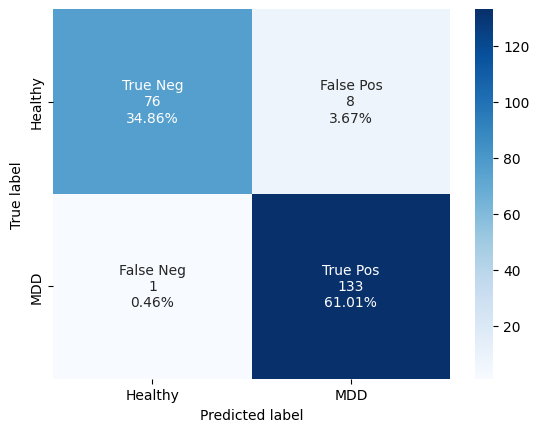

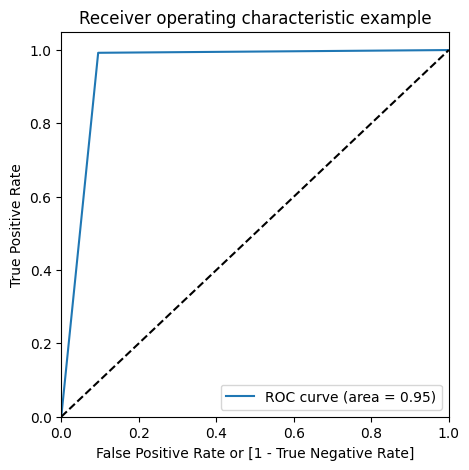

In [ ]:
svm_predictions = gscv.predict(x_test)
	
print('Precision: %.3f' % precision_score(y_test, svm_predictions))
print('Recall: %.3f' % recall_score(y_test, svm_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, svm_predictions))
print('F1 Score: %.3f' % f1_score(y_test, svm_predictions))


# Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Healthy', 'MDD']
svm_cf_matrix = confusion_matrix(y_test, svm_predictions)

make_confusion_matrix(svm_cf_matrix, group_names=labels, categories=categories, cmap='Blues')

# ROC curve
draw_roc(y_test, svm_predictions)

# Hybrid Ensemble
a hybrid ensemble model of KNN, SVM, and Logistic Regression

In [ ]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

# Defining KNN Classifiers
model1 = LogisticRegression(**logistic_result.best_params_, max_iter=500)
estimators.append(('logistic', model1))

# Defining KNN Classifiers
model2 = KNeighborsClassifier(**knn_result.best_params_)
estimators.append(('knn', model2))

# Defining Support Vector Classifiers
model3 = SVC(**svm_result.best_params_)
estimators.append(('svm', model3))


## Hyperparameter tunning for Voting Classifier

In [ ]:
param_grid={
    "voting": ['hard','soft'],
} 

gscv = GridSearchCV(VotingClassifier(estimators), param_grid, cv=5, n_jobs=12)

t0 = time.time()
hybrid_result = gscv.fit(x_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Best score: %0.3f" % gscv.best_score_)

print("Best parameters set:")
best_parameters = gscv.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.95050163        nan]
  warnings.warn(


done in 1.829s

Best score: 0.951
Best parameters set:
	voting: 'hard'


## Testing Voting Classifier

Precision: 0.936
Recall: 0.985
Accuracy: 0.950
F1 Score: 0.960


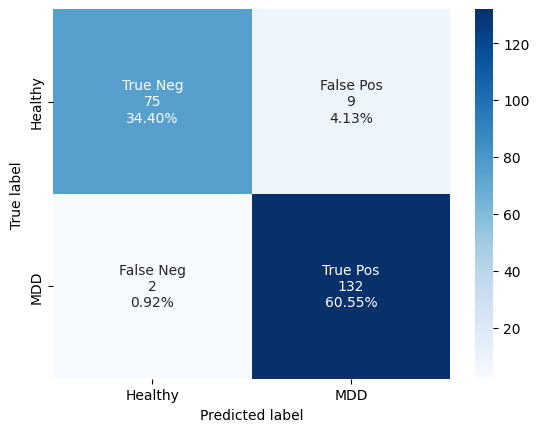

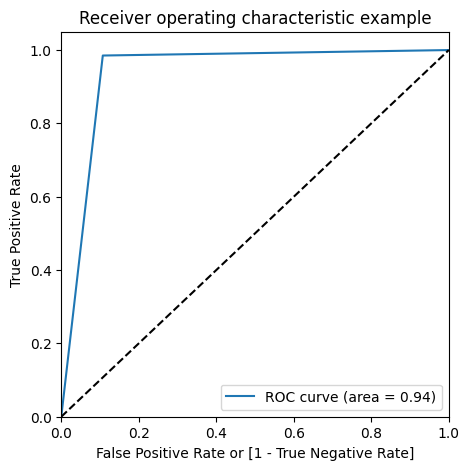

In [ ]:
hybrid_predictions = gscv.predict(x_test)
	
print('Precision: %.3f' % precision_score(y_test, hybrid_predictions))
print('Recall: %.3f' % recall_score(y_test, hybrid_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, hybrid_predictions))
print('F1 Score: %.3f' % f1_score(y_test, hybrid_predictions))


# Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Healthy', 'MDD']
hybrid_cf_matrix = confusion_matrix(y_test, hybrid_predictions)

make_confusion_matrix(hybrid_cf_matrix, group_names=labels, categories=categories, cmap='Blues')

# ROC curve
draw_roc(y_test, hybrid_predictions)

## Traning and Testing Stacking Classifier

done in 1.919s

Precision: 0.964
Recall: 0.985
Accuracy: 0.968
F1 Score: 0.974


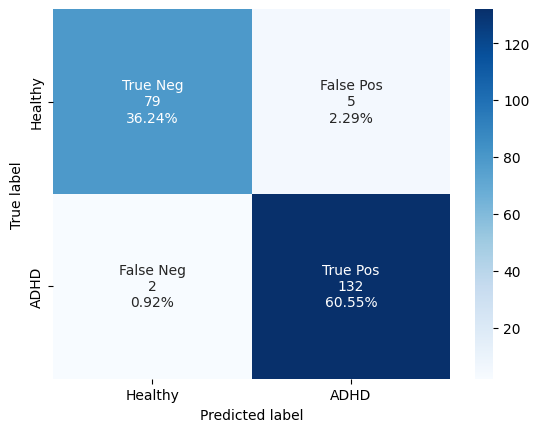

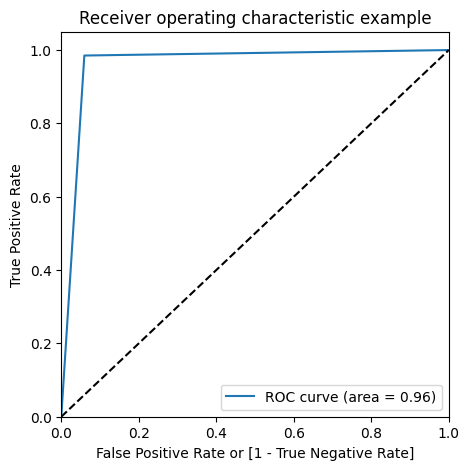

In [ ]:
gscv = StackingClassifier(estimators, cv=5, n_jobs=12)

t0 = time.time()
stacking_result = gscv.fit(x_train, y_train)
print("done in %0.3fs" % (time.time() - t0))
print()

stacking_predictions = gscv.predict(x_test)
	
print('Precision: %.3f' % precision_score(y_test, stacking_predictions))
print('Recall: %.3f' % recall_score(y_test, stacking_predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, stacking_predictions))
print('F1 Score: %.3f' % f1_score(y_test, stacking_predictions))


# Confusion Matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Healthy', 'ADHD']
stacking_cf_matrix = confusion_matrix(y_test, stacking_predictions)

make_confusion_matrix(stacking_cf_matrix, group_names=labels, categories=categories, cmap='Blues')

# ROC curve
draw_roc(y_test, stacking_predictions)


# Prediction example
trying to predict well being with random data 

In [ ]:
import random

print("selecting random sample from data_array...")
n_rows = len(data_array)
random_row_index = random.randint(0, n_rows-1)
print("Chosen index: ",random_row_index)
print()

print("Processing the data and fitting to model...")
# Get the selected row
selected_data = data_array[random_row_index]
selected_label = label_array[random_row_index]

# Get the features of the data
feature_data = concatenate_features(selected_data)

# Standardlize data
sc_x = StandardScaler()
feature_data=[feature_data]
feature_data = sc_x.fit_transform(feature_data)

# Predict
res = gscv.predict(feature_data)

if res==1:
  print("Prediction: MDD")
else:
  print("Prediction: Healthy")

print()

# check Accuracy
print("Checking accuracy of the prediction...")
if res==selected_label:
  print("Correct Prediction!")
else:
  print("Incorrect Prediction!")



selecting random sample from data_array...
Chosen index:  1064

Processing the data and fitting to model...
Prediction: MDD

Checking accuracy of the prediction...
Correct Prediction!
